In [3]:
# kaggle dataset
import numpy as np 
import pandas as pd 
import seaborn as sns

data = pd.read_csv('data/kc_house_data.csv', engine = 'python' )
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#null 값 및 data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [8]:
data2 = data.drop(['id', 'date'], axis=1)
data2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


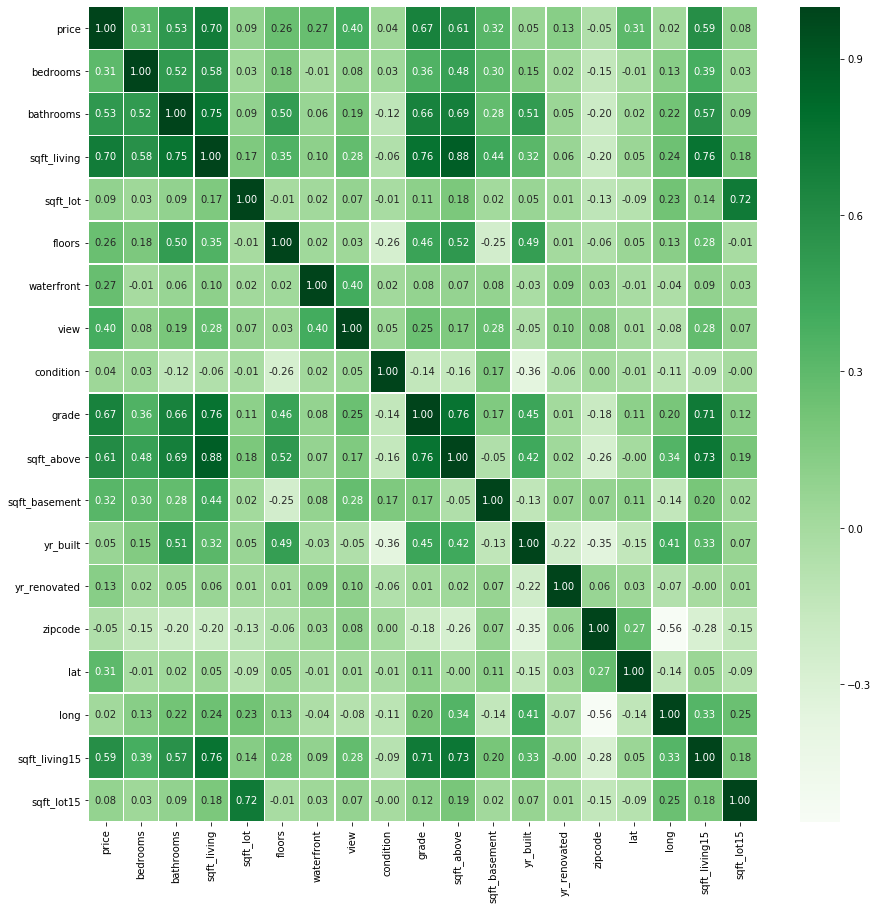

In [19]:
# 상관관계 알아보기
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(15,15))
sns.heatmap(data = data2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Greens')

In [34]:
# 컬럼 뽑아내기
df = abs(data2.corr().price)
removed_feature = df[df < 0.1]
removed_feature

sqft_lot      0.089661
condition     0.036362
yr_built      0.054012
zipcode       0.053203
long          0.021626
sqft_lot15    0.082447
Name: price, dtype: float64

In [41]:
data3 = data2.drop(removed_feature.index, axis=1)
print(data3.columns)
data3.head()

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15'],
      dtype='object')


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800


In [63]:
col = data3.drop('price', axis=1).columns
Y = data3['price']
X = data3[col]
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800


In [64]:
#데이터 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
3519,5,3.75,5340,2.5,0,3,10,3740,1600,0,47.5795,3910
2944,4,2.50,2490,2.0,0,0,9,2490,0,0,47.6507,3170
18821,3,2.25,1760,1.0,0,0,7,1190,570,0,47.6525,2260
4976,4,2.50,2601,2.0,0,0,9,2601,0,0,47.7420,2080
21056,4,2.25,1610,2.0,0,0,7,1610,0,0,47.3669,1760


In [86]:
# 선형회귀
from sklearn.linear_model import LinearRegression


lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(x_train, y_train)
accuracy = lm.score(x_test, y_test)
print("Linear Regression test file accuracy: {0} %".format(round(accuracy, 4) * 100))
print('상관도 :', lm.coef_)

Linear Regression test file accuracy: 64.12 %
상관도 : [-2.63551535e+04 -6.88829771e+03  1.01819100e+02 -2.82797757e+04
  6.12906987e+05  6.64161469e+04  8.24810628e+04  9.81071654e+01
  9.65793778e+01  5.61933794e+01  6.70181907e+05  3.26496302e+00]


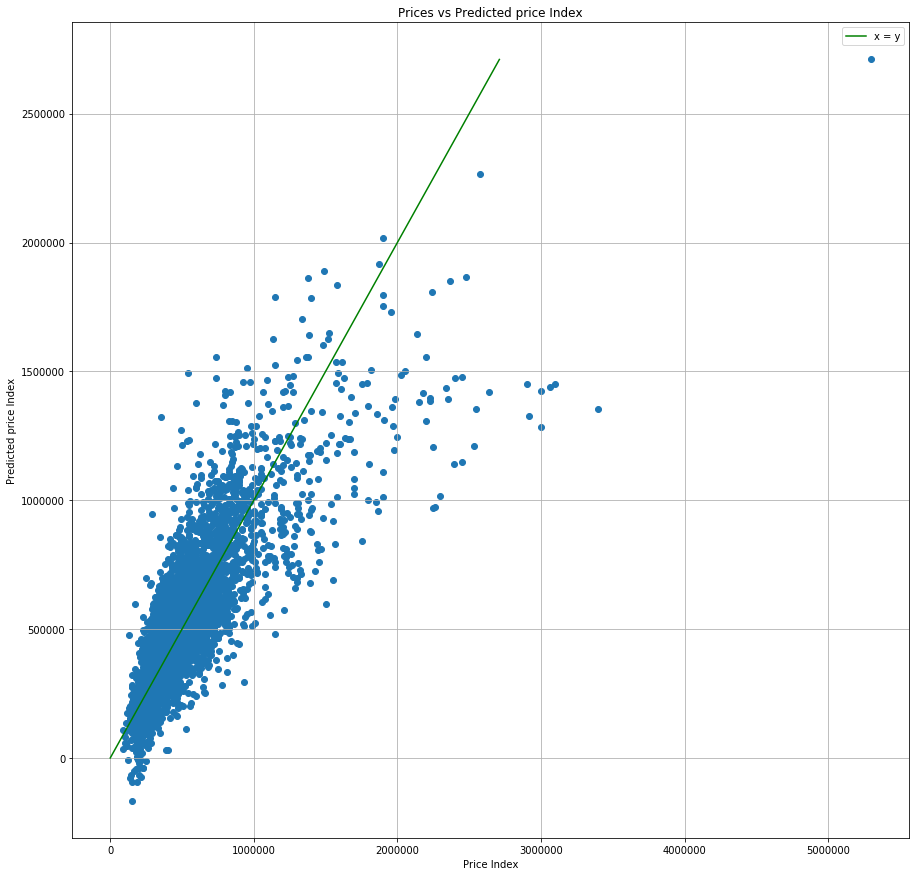

In [90]:
y_pred = lm.predict(x_test)

x = ([0, max(y_pred)])

plt.figure(figsize=(15,15))
plt.scatter(y_test, y_pred)
plt.plot(x, x, 'g', label = 'x = y')
plt.legend()
plt.grid(True)
plt.xlabel("Price Index")
plt.ylabel("Predicted price Index")
plt.title("Prices vs Predicted price Index")
plt.show()